In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('./data/TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Close 가격을 사용하여 주가 예측
data = df['Close'].values.reshape(-1, 1)


In [2]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [3]:
# 3. 시퀀스 생성
window = 30   # 최근 30일 → 다음날 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)


In [4]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0020
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6106e-04
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7902e-04
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4092e-04
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4605e-04
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2664e-04
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4266e-04
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3010e-04
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3069e-04
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7960e-04
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7106e-04
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6338e-04
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6112e-04
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5618e-04
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


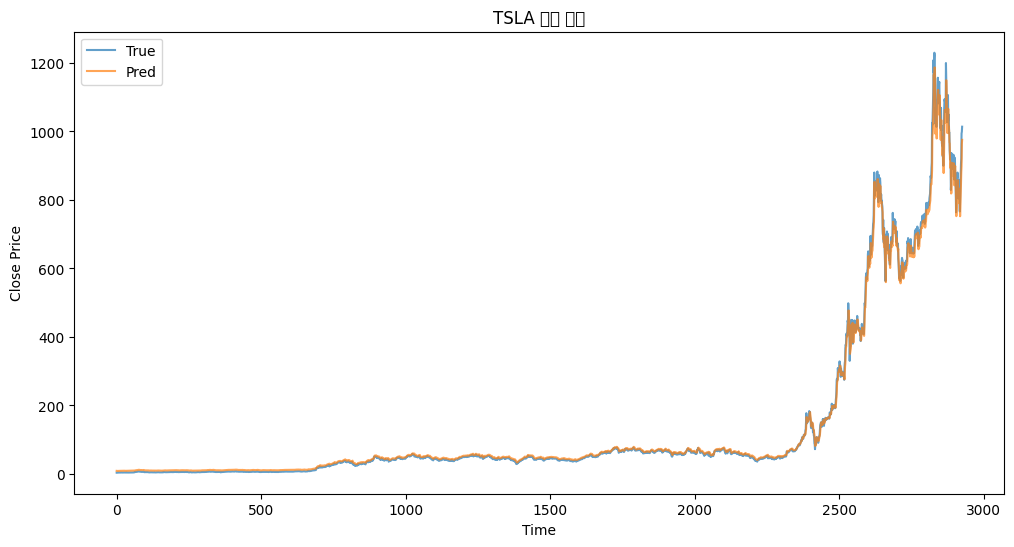

In [5]:
# 5. 예측
pred = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y), label='True', alpha=0.7)
plt.plot(scaler.inverse_transform(pred), label='Pred', alpha=0.7)
plt.title('TSLA 주가 예측')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
